In [1]:
import h5netcdf
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv
import os
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re
import cartopy.crs as ccrs
import cartopy.util as cutil
import xarray as xr
from matplotlib import animation
from matplotlib import cm
import string
import matplotlib.colors as mcolors
import matplotlib.backends.backend_pdf
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size'   : 9})
rc('text', usetex=True)
import matplotlib.backends.backend_pdf



In [2]:
with h5netcdf.File('Data/manual_baths_4deg_final.nc','r') as f:
    bathymetrys = f['bathymetry'][:]
    masks = f['mask'][:]
    xt = f['xt'][:]
    yt = f['yt'][:]

*print a colormap*


In [3]:

colors1 = cm.rainbow(np.linspace(0, 1, 35))

N=15
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(colors1[-1, 0], 200/255, N)
vals[:, 1] = np.linspace(colors1[-1, 1], 90/255, N)
vals[:, 2] = np.linspace(colors1[-1, 2], 100/255, N)

black = np.ones((1, 4))
black[:, 0] = 0
black[:, 1] = 0
black[:, 2] = 0
# combine them and build a new colormap
colors = np.vstack((colors1, vals,black))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors, N=50)


Plot


11
12
13
14


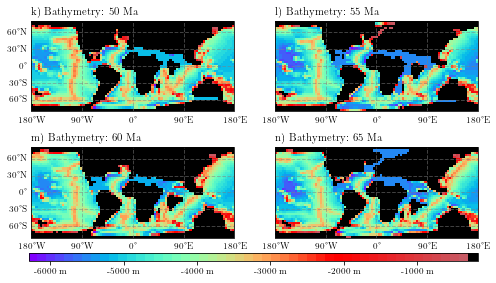

In [4]:
#fig = plt.figure()

pdf = matplotlib.backends.backend_pdf.PdfPages("../figures/bathymetries_2.pdf")
fig, axes = plt.subplots( 2,2, subplot_kw=dict(projection=ccrs.PlateCarree()),figsize=(8, 4.4))

time = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
letter = list(string.ascii_lowercase)
i=10
for row in axes:
    for col in row:
        if i > 13:
            continue
        gl = col.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
        if i % 2 == 0:
            gl.xlabels_top = False
            gl.ylabels_right = False
        else:
            gl.xlabels_top = False
            gl.ylabels_right = False
            gl.ylabels_left = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylocator = mticker.FixedLocator([-80, -60, -30, 0, 30, 60, 80])
        gl.xlocator = mticker.FixedLocator([-180,-90, 0,90, 180])

        bt = bathymetrys[i]
        bt[masks[i] == 1] = np.nan
        
        bt, bxt = cutil.add_cyclic_point(bt, coord=xt)
        btmask, bxt = cutil.add_cyclic_point(masks[i], coord=xt)
        bt = np.flip(bt,axis=0)
        btmask = np.flip(btmask,axis=0)
        # col.pcolor(bxt,yt,btmask, cmap='binary', transform=ccrs.PlateCarree())
        # tom = col.pcolor(bxt,yt,bt, cmap=mymap, transform=ccrs.PlateCarree())
        col.imshow(btmask, origin='upper', cmap='binary',extent=[-180, 180, -80, 80], transform=ccrs.PlateCarree(),interpolation='none')
        tom = col.imshow(bt, origin='upper', cmap=mymap, extent=[-180, 180, -80, 80], transform=ccrs.PlateCarree(),interpolation='none')
        col.set_title("%s) Bathymetry: %i Ma" % (letter[i],time[i]), loc='left')
        i = i + 1
        print(i)
fig.subplots_adjust(bottom=0.15) 
cbar_ax = fig.add_axes([0.12, 0.10, 0.78, 0.025])
fig.colorbar(tom, cax=cbar_ax,format='%i m', fraction=0.025, pad=0.08, orientation='horizontal')

pdf.savefig(fig)
pdf.close()

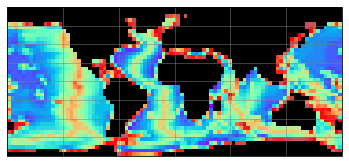

In [15]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree())
bt = bathymetrys[5]
bt[masks[5] == 1] = np.nan

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylabels_left = False
gl.xlabels_bottom = False

bt, bxt = cutil.add_cyclic_point(bt, coord=xt)
btmask, bxt = cutil.add_cyclic_point(masks[5], coord=xt)
bt = np.flip(bt,axis=0)
btmask = np.flip(btmask,axis=0)
ax.imshow(btmask, origin='upper', cmap='binary',extent=[-180, 180, -80, 80], transform=ccrs.PlateCarree(),interpolation='none')
tom = ax.imshow(bt, origin='upper', cmap=mymap, extent=[-180, 180, -80, 80], transform=ccrs.PlateCarree(),interpolation='none')

plt.savefig('../figures/show_passages.png',dpi = 500)